In [ ]:
# Assessment 1
import pandas as pd

url = "https://raw.githubusercontent.com/TopsCode/Data_Analysis_2024/main/ALL_CSV/banklist.csv"
banks = pd.read_csv(url)



In [ ]:
banks.head()


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [ ]:
banks.columns


Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

In [ ]:
banks['ST'].nunique()


44

In [ ]:
banks['ST'].unique()


array(['IL', 'WI', 'LA', 'UT', 'NJ', 'AR', 'GA', 'PA', 'TN', 'WA', 'CO',
       'PR', 'FL', 'MN', 'CA', 'MD', 'OK', 'OH', 'SC', 'VA', 'ID', 'TX',
       'CT', 'AZ', 'NV', 'NC', 'KY', 'MO', 'KS', 'AL', 'MI', 'IN', 'IA',
       'NE', 'MS', 'NM', 'OR', 'NY', 'MA', 'SD', 'WY', 'WV', 'NH', 'HI'],
      dtype=object)

In [ ]:
banks['ST'].value_counts().head(5)


,count
ST,
GA,93
FL,75
IL,68
CA,41
MN,23


In [ ]:
banks['Acquiring Institution'].value_counts().head(5)


,count
Acquiring Institution,
No Acquirer,31
State Bank and Trust Company,12
First-Citizens Bank & Trust Company,11
Ameris Bank,10
U.S. Bank N.A.,9


In [ ]:
sbt = banks[banks['Acquiring Institution'] == 'State Bank of Texas']

total_acquired = sbt.shape[0]
texas_only = sbt[sbt['ST'] == 'TX'].shape[0]

total_acquired, texas_only


(3, 1)

In [ ]:
banks[banks['ST'] == 'CA']['City'].value_counts().head(1)


,count
City,
Los Angeles,4


In [ ]:
#Assessment 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
df = pd.read_csv("historical_automobile_sales.csv")


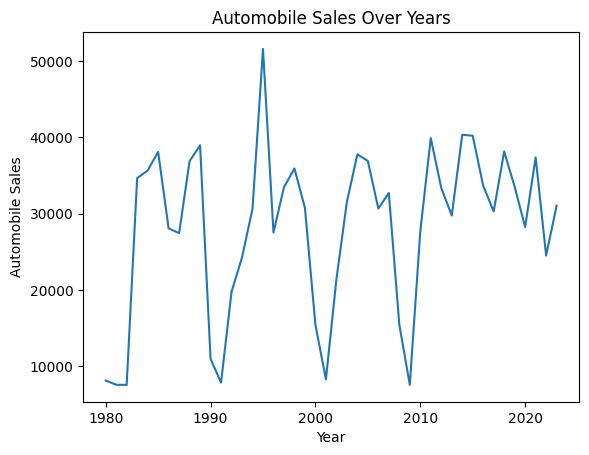

In [ ]:
df.groupby('Year')['Automobile_Sales'].sum().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales Over Years')
plt.show()


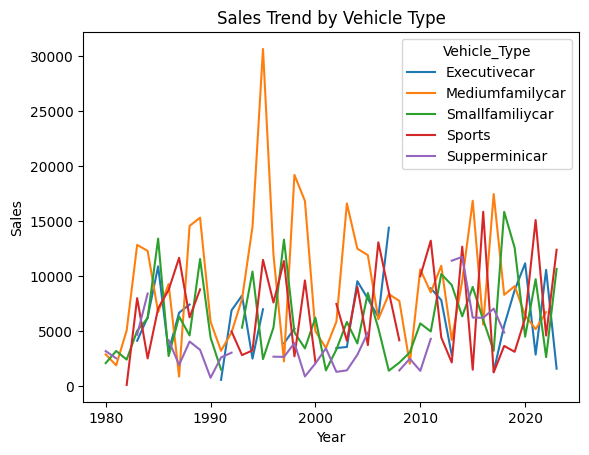

In [ ]:
pivot_df = df.pivot_table(values='Automobile_Sales',
                          index='Year',
                          columns='Vehicle_Type',
                          aggfunc='sum')

pivot_df.plot()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend by Vehicle Type')
plt.show()


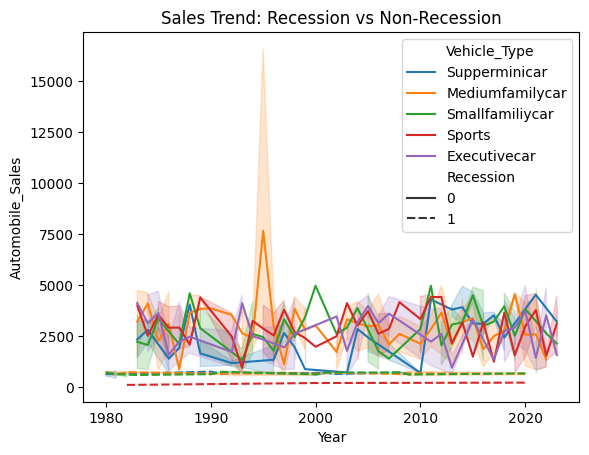

In [ ]:
sns.lineplot(data=df, x='Year', y='Automobile_Sales',
             hue='Vehicle_Type', style='Recession')

plt.title('Sales Trend: Recession vs Non-Recession')
plt.show()


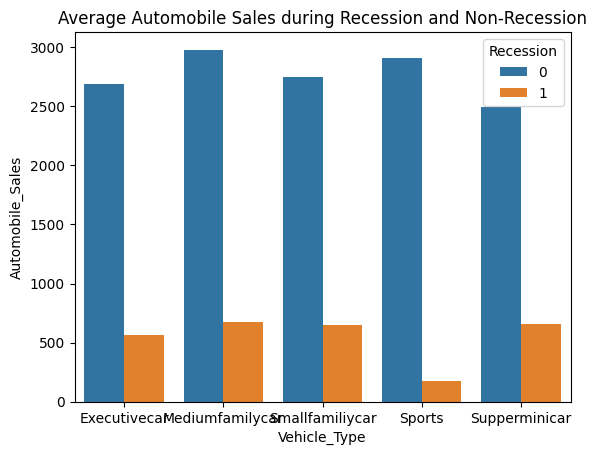

In [ ]:
avg_sales = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

sns.barplot(x='Vehicle_Type',
            y='Automobile_Sales',
            hue='Recession',
            data=avg_sales)

plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.show()
